In [79]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

In [80]:
df = pd.read_csv('/content/ESS2e03_6.csv')

In [81]:
# unnecessary column
df.drop(['name'], axis = 1, inplace = True)

We will start by answering the question "Does watching more tv, listening to the radio, reading newspaper, or using the internet effect people to trust their goverment more"?

In [82]:
# total time spent on tv(normal and polytical), radio, newspaper, and internet.
propaganda_variables = ['tvtot','tvpol','rdtot','rdpol','nwsptot','nwsppol','netuse']

In [83]:
df.loc[:,['tvtot','tvpol','rdtot','rdpol','nwsptot','nwsppol','netuse']]

,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse
0,3,2,0,66,4,2,7
1,7,2,3,1,5,2,0
2,6,2,1,0,1,0,6
3,3,1,2,1,2,1,7
4,2,1,1,1,1,1,4
...,...,...,...,...,...,...,...
3231,6,1,7,3,2,0,1
3232,5,3,7,4,1,1,2
3233,6,1,7,1,0,66,0
3234,2,1,7,0,0,66,0


In [84]:
df.loc[:,['tvtot','tvpol','rdtot','rdpol','nwsptot','nwsppol','netuse']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   tvtot    3236 non-null   int64
 1   tvpol    3236 non-null   int64
 2   rdtot    3236 non-null   int64
 3   rdpol    3236 non-null   int64
 4   nwsptot  3236 non-null   int64
 5   nwsppol  3236 non-null   int64
 6   netuse   3236 non-null   int64
dtypes: int64(7)
memory usage: 177.1 KB


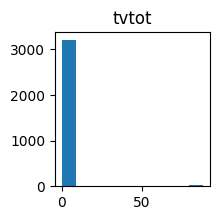

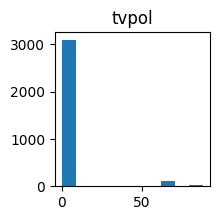

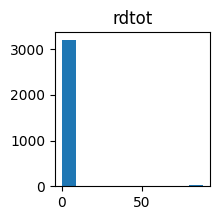

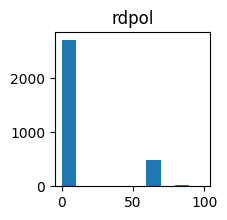

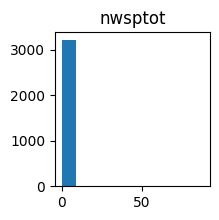

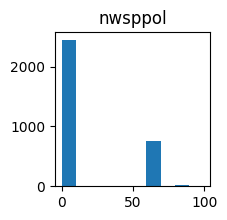

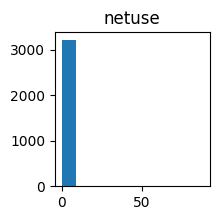

In [85]:
#plot the distibutions of all the propoganda variables
from matplotlib import pyplot as plt
for i in ['tvtot','tvpol','rdtot','rdpol','nwsptot','nwsppol','netuse']:
  plt.figure(figsize = [2,2])
  plt.title(f'{i}')
  plt.hist(df[i])

In [86]:
# df.iloc[:,:30]

In [87]:
# filter unwanted variables (for this column a value over 7 means no answer, not sure, or similar)
df[df[propaganda_variables] > 7] = np.nan
df.dropna(subset= propaganda_variables, inplace = True)

In [88]:
df[propaganda_variables].describe()

,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000
mean,4.070513,1.772682,4.049310,1.553748,1.911243,1.215483,3.804241
std,1.885069,1.043269,2.371416,1.216792,1.159254,0.857606,2.889964
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,2.000000,4.000000,1.000000,2.000000,1.000000,5.000000
75%,6.000000,2.000000,7.000000,2.000000,2.000000,1.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [89]:
import pandas as pd
import numpy as np

# preprocess the data in the column trstlgl (trust in goverment)

target = 'trstlgl'

# Replace unwanted values (77, 88, 99) with NaN (those indicate no answer, not sure, or don't want to say)
df[target].replace({77: np.nan, 88: np.nan, 99: np.nan}, inplace=True)

# Drop rows with NaN values in the target column
df.dropna(subset=[target], inplace=True)
df.shape


(1979, 603)

In [90]:
# create a variable with total time spent on any sort of information source (tv, radio....)
df['total_time'] = df[propaganda_variables].sum(axis=1)

In [91]:
df['trstlgl_binary'] = df['trstlgl'].apply(lambda x: 1 if x > 5 else 0)

Let's first check if our classes are balanced

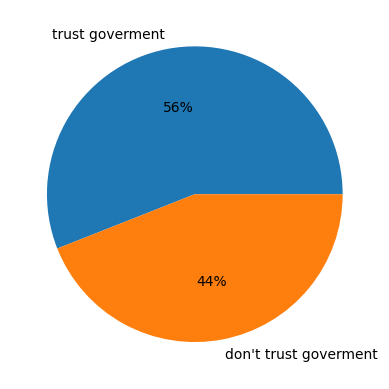

In [92]:
trust_gov = df.loc[(df.trstlgl_binary == 1)]
dont_trust_gov = df.loc[(df.trstlgl_binary == 0)]
percent_s_m = trust_gov.shape[0]/df.shape[0]
plt.pie( [percent_s_m,1-percent_s_m],autopct='%.0f%%', labels = ['trust goverment','''don't trust goverment'''])
plt.show()

In [93]:
# this cell is taken from labs
def silly_ecdf(data):

    x = np.unique(data)
    y = []
    for item in x:
        y.append(
            np.sum(data <= item)
        )

    y = np.array(y, dtype=float)
    y /= len(data)

    return x, y

def plot_ecdf(x, y, show=True):
    plt.scatter(x, y, label='ECDF')
    plt.plot(x, y, '--')
    if len(x) < 20:
        plt.vlines(x, ymin=0, ymax=y, linestyles='dotted', alpha=0.4)
    plt.ylim(0, 1.1)
    plt.xlabel('Value')
    plt.ylabel('Probability (less than value)')
    plt.legend()
    if show:
        plt.show()


In [94]:
#this cell is taken from labs
def silly_hist(data, num_bins=30):
    binw = (data.max() - data.min()) / num_bins

    y = [
        np.sum(
            (data.min() + binw * mult < data) & (data < data.min() + binw * (mult + 1))
        )
        for mult in range(num_bins)
    ]

    y = np.array(y, dtype=float)
    y /= len(data)

    x = [data.min() + binw * mult for mult in range(num_bins)]
    x = np.array(x, dtype=float)

    return x, y


def plot_hist(x, y, show=True):
    binw = x[1] - x[0]
    plt.bar(x, y, label="Hist", edgecolor="black", width=binw)
    plt.xlabel("Value")
    plt.ylabel("Probability")
    plt.legend()
    if show:
        plt.show()

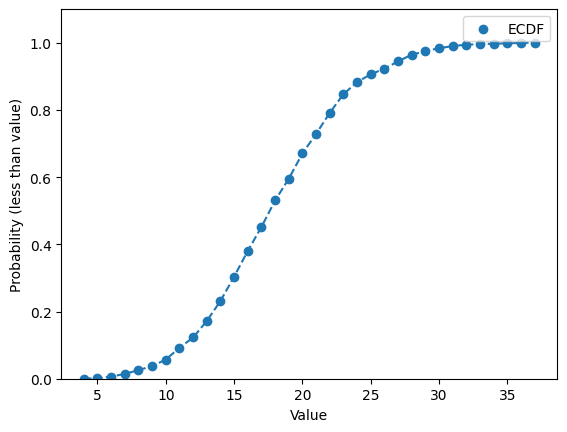

<Figure size 640x480 with 0 Axes>

In [95]:
data = df['total_time']
ecdf_x, ecdf_y = silly_ecdf(data)
plot_ecdf(ecdf_x, ecdf_y)
plt.draw()

In [96]:
hist, bin_edges = np.histogram(data)
hist, bin_edges

(array([ 28,  85, 227, 554, 433, 349, 193,  78,  23,   9]),
 array([ 4. ,  7.3, 10.6, 13.9, 17.2, 20.5, 23.8, 27.1, 30.4, 33.7, 37. ]))

In [97]:
from scipy.stats import rv_histogram

hist_dist = rv_histogram((hist, bin_edges), density=False)
hist_dist.pdf(1.0)

0.0

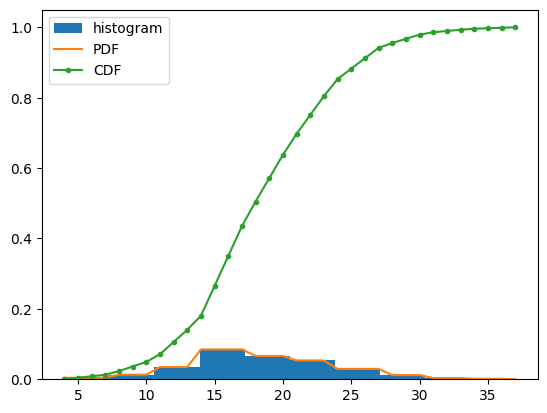

In [98]:
X = np.arange(data.min(), data.max()+1, 1)

fig, ax = plt.subplots()
_ = ax.hist(data, label="histogram", density=True)
_ = ax.plot(X, hist_dist.pdf(X), label="PDF")
_ = ax.plot(X, hist_dist.cdf(X), ".-", label="CDF")
ax.legend()
plt.show()

In [99]:
from scipy.stats import kstest
from scipy.stats import norm
kstest(data, norm.cdf)

KstestResult(statistic=0.9999683287581669, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)

In [100]:
from collections import Counter

my_list = trust_gov['total_time']

# Count occurrences of each number using Counter
occurrences = Counter(my_list)

# Convert Counter object to a list
occurrences_list = [occurrences[i] for i in range(100)]

my_list = dont_trust_gov['total_time']

# Count occurrences of each number using Counter
occurrences2 = Counter(my_list)

# Convert Counter object to a list
occurrences_list = [occurrences2[i] for i in range(100)]


<Axes: >

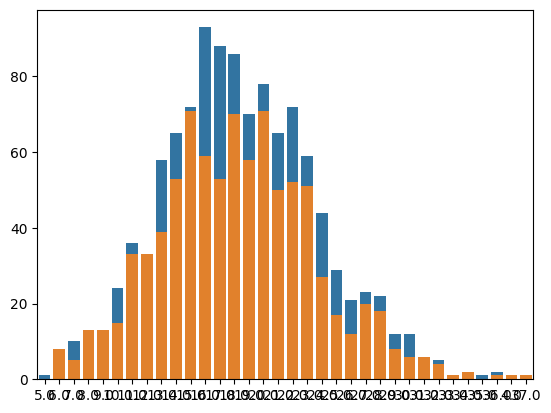

In [101]:
sns.barplot(occurrences)
sns.barplot(occurrences2)

In [102]:
from scipy.stats import kstest
from scipy.stats import norm
kstest(trust_gov['total_time'], dont_trust_gov['total_time'])

KstestResult(statistic=0.039960914671297774, pvalue=0.4036368994851634, statistic_location=15.0, statistic_sign=-1)

In [103]:
from scipy.stats import kruskal
for variable in propaganda_variables:
  print(variable)
  print(kruskal(trust_gov[variable], dont_trust_gov[variable]))

tvtot
KruskalResult(statistic=1.1445202264046364, pvalue=0.28469920312898755)
tvpol
KruskalResult(statistic=4.415982208415381, pvalue=0.035603775921344324)
rdtot
KruskalResult(statistic=0.029860397813885463, pvalue=0.8628073683123579)
rdpol
KruskalResult(statistic=3.6018439719551654, pvalue=0.05771551992302569)
nwsptot
KruskalResult(statistic=0.8856627364297531, pvalue=0.34665537793100687)
nwsppol
KruskalResult(statistic=6.513485431164517, pvalue=0.010705946368031538)
netuse
KruskalResult(statistic=2.968283906053593, pvalue=0.08491188594778394)


In [104]:
high_time = df[df['nwsppol'] > df['nwsppol'].mean()]
low_time = df[df['nwsppol'] <= df['nwsppol'].mean()]

In [105]:
from scipy.stats import mannwhitneyu

U1, p = mannwhitneyu(high_time['trstlgl'],
                     low_time['trstlgl'], method="auto")
p

0.0010071002043813098

In [106]:
print(kruskal(trust_gov['total_time'], dont_trust_gov['total_time']))

KruskalResult(statistic=1.6773508540993873, pvalue=0.19527683388611736)


Now for the second part, answering the question "Are people with opennes to taking pills more or less healthy"?

In [107]:
df = pd.read_csv('/content/ESS2e03_6.csv')
targets = [ 'health','usmdprs','tmcnsdc', 'hltherb',  'illcure']
for target in targets:
    df[target].replace({7: np.nan, 8: np.nan, 9: np.nan}, inplace=True)
    df.dropna(subset=[target], inplace=True)
target = 'mdsdeff'

# Replace unwanted values (7, 8, 9) with NaN
df[target].replace({6:np.nan,7: np.nan, 8: np.nan, 9: np.nan}, inplace=True)

df.dropna(subset=[target], inplace=True)
df.shape


(3031, 604)

In [108]:
import pandas as pd
from sklearn.impute import SimpleImputer

target = 'hltherb'

# Define the imputer
imputer = SimpleImputer(strategy='mean', missing_values=6)

# Apply imputation to the target column
df[target] = imputer.fit_transform(df[[target]])

# Round the imputed values to the closest integer
df[target] = df[target].round().astype(int)

# Now df contains the 'hltherb' column with replaced values rounded to the nearest integer
df.shape


(3031, 604)

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing your data

# Define a dictionary to map variable names to their labels
variable_labels = {
    'mdsdeff': 'Worry about side effects of drug',
    'illcure': 'Most illnesses cure themselves',
    'usmdprs': 'Regularly taking any pills or using any medication prescribed',
    'hltherb': 'Use herbal remedies',
    'tmcnsdc': 'How many times in the past twelve months have you consulted a doctor'
}



In [110]:
# Mapping for 'illcure'
illcure_mapping = {
    1: 'Agree strongly',
    2: 'Agree',
    3: 'Neither agree nor disagree',
    4: 'Disagree',
    5: 'Disagree strongly',
    7: 'Refusal',
    8: "Don't know",
    9: 'No answer'
}

# Mapping for 'usmdprs'
usmdprs_mapping = {
    1: 'Yes',
    2: 'No',
    7: 'Refusal',
    8: "Don't know",
    9: 'No answer'
}

# Mapping for 'mdsdeff'
mdsdeff_mapping = {
    1: 'Never or almost never',
    2: 'Some of the time',
    3: 'About half the time',
    4: 'Most of the time',
    5: 'Always or almost always',
    6: "Don't use prescribed medicine",
    7: 'Refusal',
    8: "Don't know",
    9: 'No answer'
}

# Mapping for 'hltherb'
hltherb_mapping = {
    1: 'Never or almost never',
    2: 'Some of the time',
    3: 'About half the time',
    4: 'Most of the time',
    5: 'Always or almost always',
    6: "Don't have health problem",
    7: 'Refusal',
    8: "Don't know",
    9: 'No answer'
}

# Mapping for 'tmcnsdc'
tmcnsdc_mapping = {
    1: 'Never',
    2: 'Once or twice',
    3: '3-5 times',
    4: '6-10 times',
    5: 'More than 10 times',
    7: 'Refusal',
    8: "Don't know",
    9: 'No answer'
}

# Mapping for 'health'
health_mapping = {
    1: 'Very good',
    2: 'Good',
    3: 'Fair',
    4: 'Bad',
    5: 'Very bad',
    7: 'Refusal',
    8: "Don't know",
    9: 'No answer'
}

# Create new columns with mapped values
df_mapped = df.copy()  # Create a copy of the original DataFrame

df_mapped['illcure_mapped'] = df_mapped['illcure'].map(illcure_mapping)
df_mapped['usmdprs_mapped'] = df_mapped['usmdprs'].map(usmdprs_mapping)
df_mapped['mdsdeff_mapped'] = df_mapped['mdsdeff'].map(mdsdeff_mapping)
df_mapped['hltherb_mapped'] = df_mapped['hltherb'].map(hltherb_mapping)
df_mapped['tmcnsdc_mapped'] = df_mapped['tmcnsdc'].map(tmcnsdc_mapping)
df_mapped['health_mapped'] = df_mapped['health'].map(health_mapping)

# Now df_mapped contains new columns with mapped values
# Create new columns with mapped values
df_mapped = df.copy()  # Create a copy of the original DataFrame

df_mapped['illcure_mapped'] = df_mapped['illcure'].map(illcure_mapping)
df_mapped['usmdprs_mapped'] = df_mapped['usmdprs'].map(usmdprs_mapping)
df_mapped['mdsdeff_mapped'] = df_mapped['mdsdeff'].map(mdsdeff_mapping)
df_mapped['hltherb_mapped'] = df_mapped['hltherb'].map(hltherb_mapping)
df_mapped['tmcnsdc_mapped'] = df_mapped['tmcnsdc'].map(tmcnsdc_mapping)
df_mapped['health_mapped'] = df_mapped['health'].map(health_mapping)

# Now df_mapped contains new columns with mapped values
# Assuming df_mapped is your DataFrame containing mapped values

# Define a dictionary to map variable names to their labels
variable_labels = {
    'mdsdeff_mapped': 'Worry about side effects of drug',
    'illcure_mapped': 'Most illnesses cure themselves without having to visit doctor',
    'usmdprs_mapped': 'Regularly taking pills or use medication prescribed for you',
    'hltherb_mapped': 'Use herbal remedies if health problem, how often',
    'tmcnsdc_mapped': 'Consulted doctor/specialist/GP, how many times last 12 months'
}



In [111]:
threshold = 4
non_healthy_group = df[df['health'] >= threshold]
healthy_group = df[df['health'] < threshold]


In [112]:
from scipy.stats import kruskal

# Separate data into two groups based on the threshold for 'health'
threshold = 3
pvalues = []
for var in ['mdsdeff', 'illcure', 'usmdprs', 'hltherb', 'tmcnsdc']:
    group_1_1 = non_healthy_group[var]
    group_2_2 = healthy_group[var]

    # Perform Kruskal-Wallis test for each group
    statistic_1, p_value_1 = kruskal(group_1_1, group_2_2)

    print(var)
    print("Kruskal-Wallis statistic:", statistic_1)
    print("p-value:", p_value_1)
    pvalues.append(p_value_1)
    # Interpretation for group where health is equal or larger than three
    if p_value_1 < 0.05:
        print(f"Reject the null hypothesis: There is a significant difference in {var} values.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in {var} values.")



mdsdeff
Kruskal-Wallis statistic: 0.003269016482728671
p-value: 0.9544055428947447
Fail to reject the null hypothesis: There is no significant difference in mdsdeff values.
illcure
Kruskal-Wallis statistic: 32.30182054211357
p-value: 1.3198961285651684e-08
Reject the null hypothesis: There is a significant difference in illcure values.
usmdprs
Kruskal-Wallis statistic: 136.51095189416813
p-value: 1.5426045983718148e-31
Reject the null hypothesis: There is a significant difference in usmdprs values.
hltherb
Kruskal-Wallis statistic: 3.86782808195352
p-value: 0.04922017681124186
Reject the null hypothesis: There is a significant difference in hltherb values.
tmcnsdc
Kruskal-Wallis statistic: 137.08199081709478
p-value: 1.1570747963717764e-31
Reject the null hypothesis: There is a significant difference in tmcnsdc values.


In [113]:
# prompt: create a dataframe with the pvalues from the previous cell

import pandas as pd

data = {
    'variable': ['mdsdeff', 'illcure', 'usmdprs', 'hltherb', 'tmcnsdc'],
    'p-value': pvalues
}

table = pd.DataFrame(data)

table


,variable,p-value
0,mdsdeff,9.544055e-01
1,illcure,1.319896e-08
2,usmdprs,1.542605e-31
3,hltherb,4.922018e-02
4,tmcnsdc,1.157075e-31


In [114]:
average_hltherb_group_1 = non_healthy_group['hltherb'].mean()
average_hltherb_group_2 = healthy_group['hltherb'].mean()

print("Average hltherb for non healthy group:", average_hltherb_group_1)
print("Average hltherb for the healthy group:", average_hltherb_group_2)
#the healthy group rely on herbal medecine more than the non healthy group

Average hltherb for non healthy group: 2.1311475409836067
Average hltherb for the healthy group: 2.3045720178755587


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of categories based on the mapping dictionaries
illcure_order = ['Agree strongly', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Disagree strongly']
usmdprs_order = ['Yes', 'No']
mdsdeff_order = ['Never or almost never', 'Some of the time', 'About half the time', 'Most of the time', 'Always or almost always']
hltherb_order = ['Never or almost never', 'Some of the time', 'About half the time', 'Most of the time', 'Always or almost always']
tmcnsdc_order = ['Never', 'Once or twice', '3-5 times', '6-10 times', 'More than 10 times']
health_order = ['Very good', 'Good', 'Fair', 'Bad', 'Very bad']

# Define a dictionary to map variable names to their labels
variable_labels = {
    'mdsdeff_mapped': 'Worry about side effects of drug',
    'illcure_mapped': 'Most illnesses cure themselves without having to visit doctor',
    'usmdprs_mapped': 'Regularly taking pills or use medication prescribed for you',
    'hltherb_mapped': 'Use herbal remedies if health problem, how often',
    'tmcnsdc_mapped': 'Consulted doctor/specialist/GP, how many times last 12 months'
}



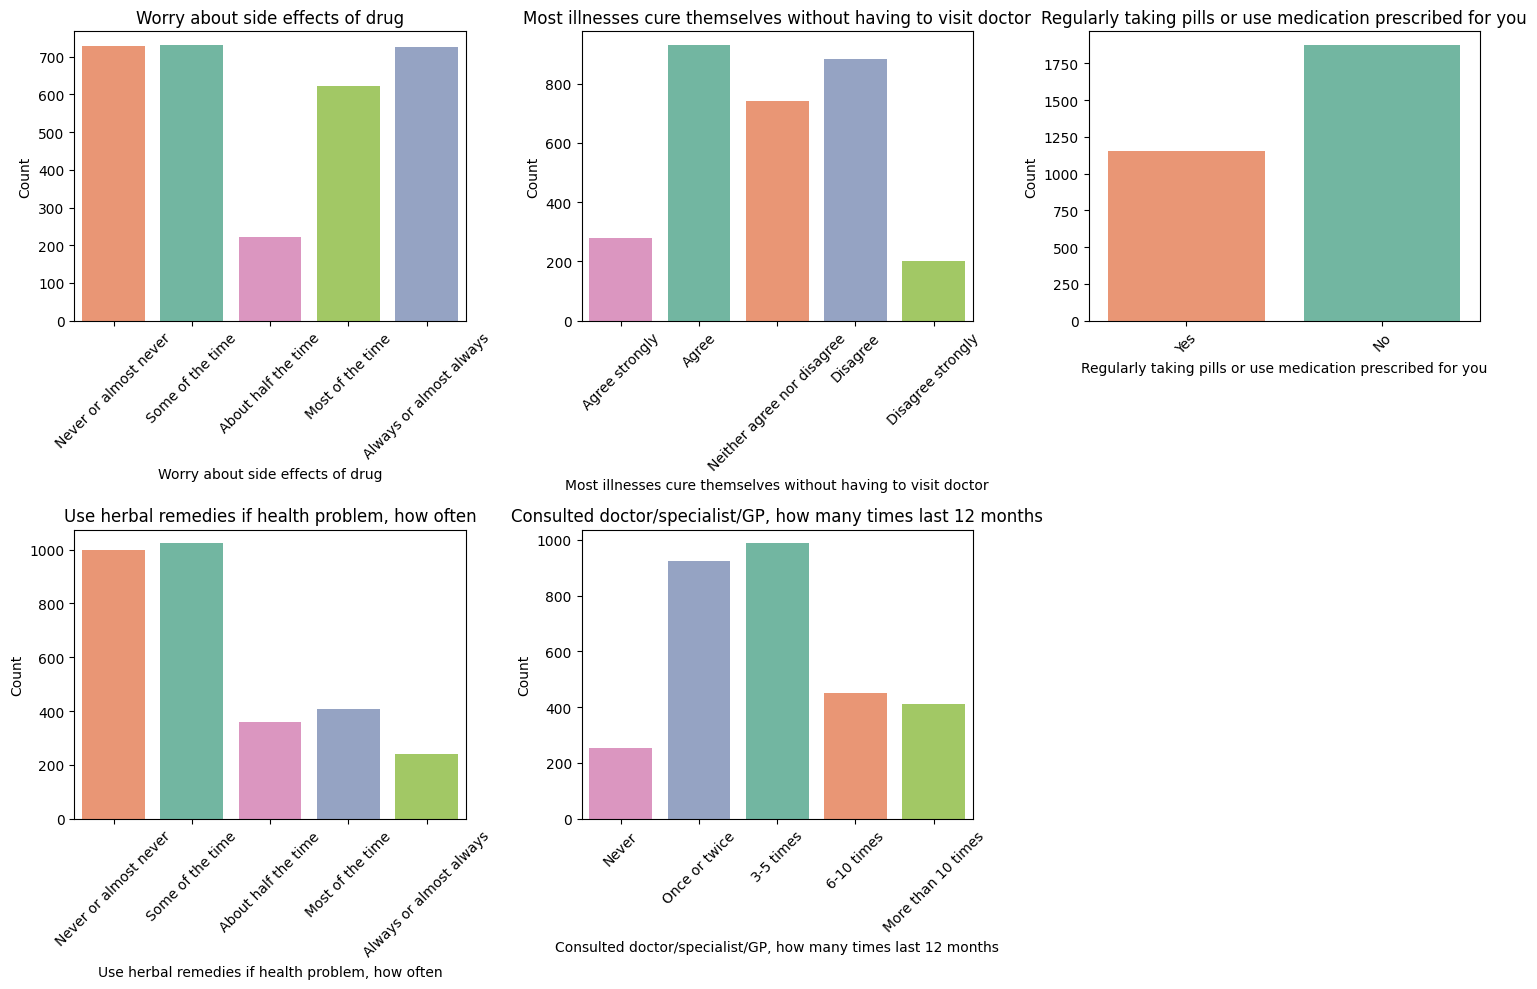

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming variable_labels and order variables are defined somewhere

num_plots = len(variable_labels)
num_rows = num_plots // 3 + int(num_plots % 3 != 0)  # Calculate number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

for i, (var, order) in enumerate([('mdsdeff_mapped', mdsdeff_order), ('illcure_mapped', illcure_order),
                                   ('usmdprs_mapped', usmdprs_order), ('hltherb_mapped', hltherb_order),
                                   ('tmcnsdc_mapped', tmcnsdc_order)]):
    row = i // 3
    col = i % 3
    sns.countplot(data=df_mapped, x=var, hue=var, palette='Set2', order=order, ax=axes[row, col], legend=False)
    axes[row, col].set_title(f'{variable_labels[var]}')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_xlabel(variable_labels[var])  # Set x-axis label
    axes[row, col].set_ylabel('Count')  # Set y-axis label

# Remove any empty subplots
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.subplots_adjust(hspace=10, wspace=0.5)  # Adjust the space between rows and columns
plt.tight_layout()
plt.show()


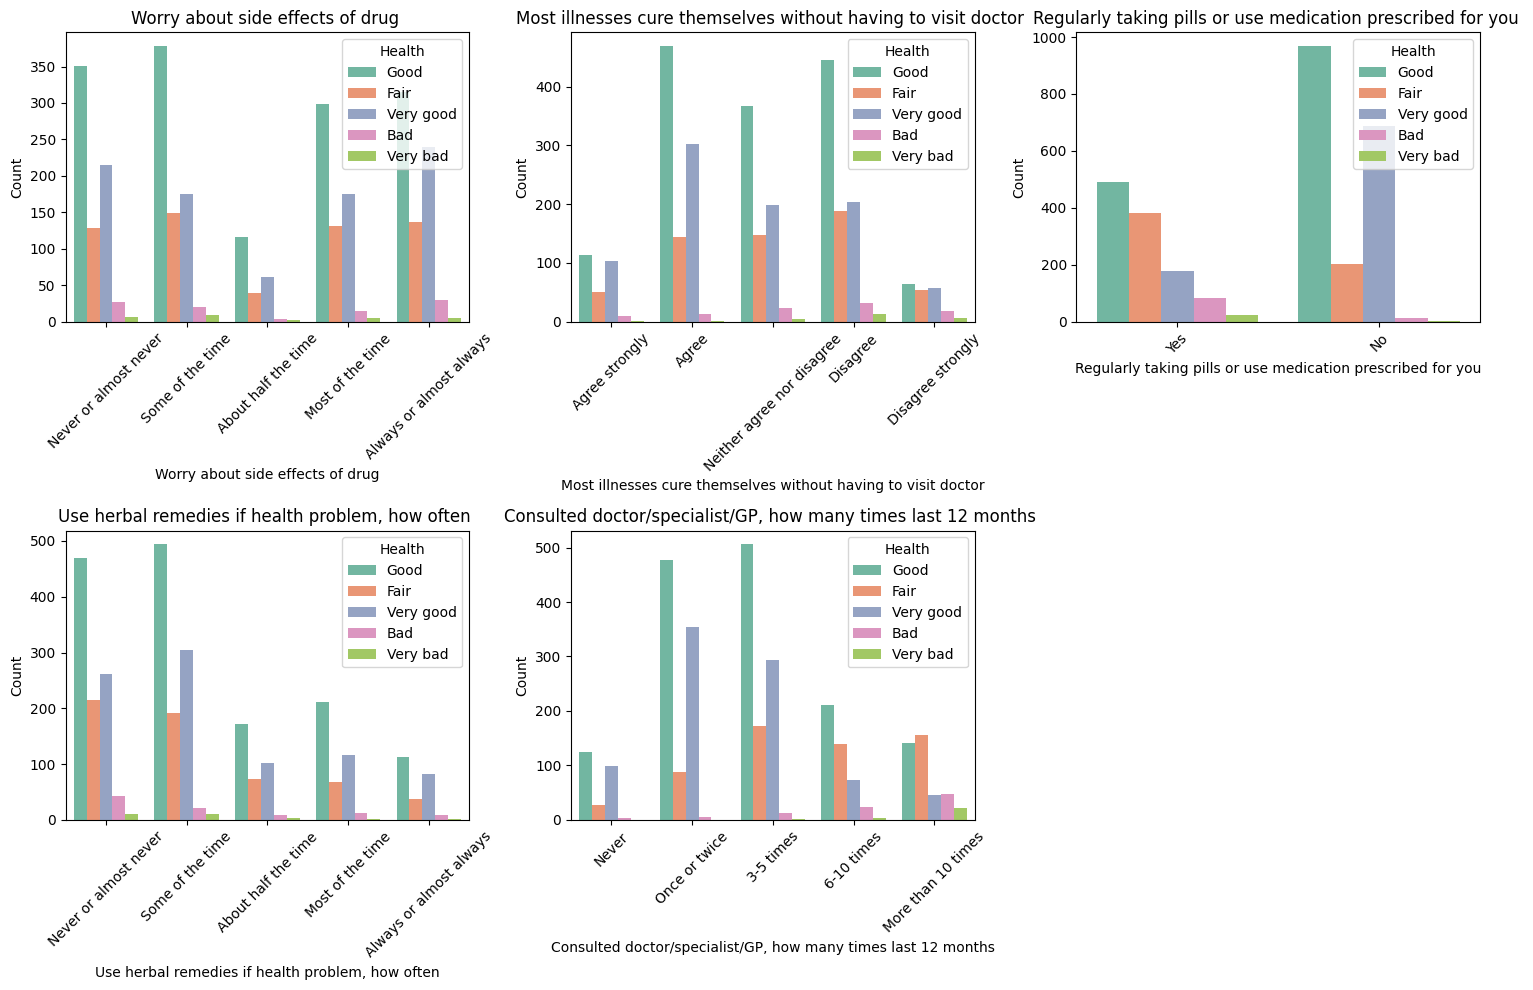

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming variable_labels and order variables are defined somewhere

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (var, order) in enumerate([('mdsdeff_mapped', mdsdeff_order), ('illcure_mapped', illcure_order),
                                   ('usmdprs_mapped', usmdprs_order), ('hltherb_mapped', hltherb_order),
                                   ('tmcnsdc_mapped', tmcnsdc_order)]):
    row = i // 3
    col = i % 3
    sns.countplot(data=df_mapped, x=var, hue='health_mapped', palette='Set2', order=order, ax=axes[row, col])
    axes[row, col].set_title(f'{variable_labels[var]} ')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_xlabel(variable_labels[var])  # Set x-axis label
    axes[row, col].set_ylabel('Count')  # Set y-axis label
    axes[row, col].legend(title='Health', loc='upper right')

# Remove any empty subplots
for i in range(len(variable_labels), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()
